# RDS Project
- Luca Wang rw2608
- Amber Wang sw4444

## Original ADS Code
- The following code shows the original implementation of the ADS
- Author: Hotson Hone, Kaggle user

### Importing required packages; Data cleaning and preprocessing

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

%config Completer.use_jedi = False

In [2]:
# import data and view samples
df = pd.read_csv("diabetic_data.csv")
df.sample(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2608,16860354,1478124,Caucasian,Male,[50-60),?,1,1,7,2,...,No,No,No,No,No,No,No,Ch,Yes,NO
17778,65021658,11056392,Caucasian,Male,[60-70),?,6,25,17,13,...,No,No,No,No,No,No,No,Ch,Yes,>30
41965,129595278,93138030,Caucasian,Male,[80-90),?,1,1,7,1,...,No,No,No,No,No,No,No,No,Yes,NO
7340,34897224,45322704,Caucasian,Male,[50-60),?,2,1,1,4,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
42337,130557798,35556426,Hispanic,Male,[40-50),?,2,1,7,5,...,No,Down,No,No,No,No,No,Ch,Yes,>30
34648,108233328,3175083,Caucasian,Male,[80-90),?,1,1,6,4,...,No,No,No,No,No,No,No,Ch,Yes,NO
28510,93481086,97649892,Caucasian,Male,[70-80),?,1,3,7,1,...,No,No,No,No,No,No,No,No,Yes,NO
38521,119756382,52204239,Caucasian,Male,[70-80),?,2,3,1,11,...,No,No,No,No,No,No,No,No,Yes,NO
31264,100483218,22863987,Caucasian,Male,[40-50),?,2,5,7,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
53149,156320832,58394088,AfricanAmerican,Female,[60-70),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,NO


In [3]:
# provide information about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# target column
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [5]:
df = df.loc[~df.discharge_disposition_id.isin([11, 13, 14, 19, 20, 21])]
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')
df[['OUTPUT_LABEL']].sample(10)

,OUTPUT_LABEL
25353,1
60506,0
38178,0
40627,0
31220,0
27825,1
95405,0
49306,0
17079,0
79551,1


In [7]:
# function for calculating prevalance of population that is readmitted within 30 days

def cal_prevalance(y_actual):
    return (sum(y_actual)/len(y_actual))

print(f"Prevalance : {round(cal_prevalance(df.OUTPUT_LABEL.values)*100, 3)} %")

Prevalance : 11.389 %


In [8]:
# Replacing '?' with NAN
df = df.replace('?', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99343 non-null  int64 
 1   patient_nbr               99343 non-null  int64 
 2   race                      97109 non-null  object
 3   gender                    99343 non-null  object
 4   age                       99343 non-null  object
 5   weight                    3125 non-null   object
 6   admission_type_id         99343 non-null  int64 
 7   discharge_disposition_id  99343 non-null  int64 
 8   admission_source_id       99343 non-null  int64 
 9   time_in_hospital          99343 non-null  int64 
 10  payer_code                59945 non-null  object
 11  medical_specialty         50727 non-null  object
 12  num_lab_procedures        99343 non-null  int64 
 13  num_procedures            99343 non-null  int64 
 14  num_medications      

In [9]:
# (For Part 2: Input and Output) Downloads the info of the data in .xlsx
# pd.concat([pd.DataFrame(df.dtypes), df.count()], axis=1).to_excel("info.xlsx")

In [10]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'OUTPUT_LABEL'],
      dtype='object')

In [11]:
# Collecting Numerical columns
num_cols = [
    'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
print('ColName              NullCount')
print('=============================')
df[num_cols].isnull().sum()

ColName              NullCount


time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [12]:
# Collecting categorical columns
cat_cols = [
    'race', 'gender',
    'max_glu_serum', 'A1Cresult',
    'metformin', 'repaglinide', 
    'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide',
    'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone',
    'tolazamide', 'insulin',
    'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change',
    'diabetesMed','payer_code'
]

print('ColName                    NullCount')
print('======================================')
df[cat_cols].isnull().sum()


ColName                    NullCount


race                         2234
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
dtype: int64

In [13]:
df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

print(f"# medical specialty : {df.medical_specialty.nunique()}")
df.groupby('medical_specialty').size().sort_values(ascending = False)

# medical specialty : 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

In [14]:
top_10 = [
    'UNK','InternalMedicine',
    'Emergency/Trauma', 'Family/GeneralPractice',
    'Cardiology', 'Surgery-General' , 
    'Nephrology', 'Orthopedics',
    'Orthopedics-Reconstructive', 'Radiologist'
]

df['med_spec'] = df['medical_specialty'].copy()
df.loc[~df.med_spec.isin(top_10), 'med_spec'] = 'Other'

df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

In [15]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')
df_cat = pd.get_dummies(df[cat_cols + cols_cat_num + ['med_spec']], drop_first = True)

df_cat.sample(5)

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
25415,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3951,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4398,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
46388,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15861,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
df = pd.concat([df, df_cat], axis = 1)

# To keep track of the categorical columns
cols_all_cat = list(df_cat.columns)

In [17]:
# Using 'age' and 'weight'

df[['age', 'weight']].sample(5)

,age,weight
79250,[70-80),NaN
53196,[60-70),NaN
84950,[70-80),NaN
57146,[70-80),NaN
29203,[30-40),NaN


In [18]:
df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

In [19]:
age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)

In [20]:
# Since 'weight' has lots of NAN values, it is better to use it as whether the paitent_ID has enrolled his/her weight or not
df["has_weight"] = df.weight.notnull().astype('int')

extra_cols = ["age_group", "has_weight"]

Upto this we have created 

* Numerical features : 8
* Categorical features : 132
* Extra features : 2

In [21]:
cols2use = num_cols + cols_all_cat + extra_cols
df_data = df[cols2use + ['OUTPUT_LABEL']]  

### Building Training, Validation, Test Sets

In [22]:
cols2use = [
    'gender_Male',
    'number_inpatient',
    'discharge_disposition_id_22',
    'number_emergency',
    'number_diagnoses',
    'num_medications',
    'time_in_hospital',
    'num_lab_procedures',
    'insulin_No',
    'age_group',
    'number_outpatient',
    'discharge_disposition_id_3',
    'num_procedures',
]

df_data = df[cols2use + ['OUTPUT_LABEL']] 

In [23]:
# Split 70:15:15, type = Stratify
# Shuffling the dataset with random state 42

df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [24]:
df_valid_test = df_data.sample(frac = 0.3, random_state = 42)
df_test = df_valid_test.sample(frac = 0.3, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)
df_train_all = df_data.drop(df_valid_test.index)

In [25]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),cal_prevalance(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),cal_prevalance(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), cal_prevalance(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 8941):0.117
Valid prevalence(n = 20862):0.114
Train all prevalence(n = 69540):0.113


In [26]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), cal_prevalance(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 15766):0.500


In [27]:
X_train = df_train[cols2use].values
X_train_all = df_train_all[cols2use].values
X_valid = df_valid[cols2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (69540, 13)
Training shapes: (15766, 13) (15766,)
Validation shapes: (20862, 13) (20862,)


In [28]:
from sklearn.preprocessing import StandardScaler
import pickle

ss = StandardScaler()

scalerfile = 'StndSclr.sav'
pickle.dump(ss, open(scalerfile, 'wb'))

# load it back
ss = pickle.load(open(scalerfile, 'rb'))

# normalization
first_column = X_train[:, 0]
remaining_columns = X_train[:, 1:]
normalized_columns = ss.fit_transform(remaining_columns)
X_train_tf = np.column_stack((first_column, normalized_columns))

first_column = X_valid[:, 0]
remaining_columns = X_valid[:, 1:]
normalized_columns = ss.fit_transform(remaining_columns)
X_valid_tf = np.column_stack((first_column, normalized_columns))

### Building and testing models

In [29]:
X_train

array([[1, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 5, 1, ..., 4, 0, 3],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 5]], dtype=int64)

In [30]:
# Creating helper functions
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%cal_prevalance(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [31]:
thresh = 0.5

In [32]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.663
accuracy:0.615
recall:0.533
precision:0.638
specificity:0.668
prevalence:0.500
 
Validation:
AUC:0.645
accuracy:0.627
recall:0.571
precision:0.167
specificity:0.604
prevalence:0.114
 


In [33]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.658
accuracy:0.614
recall:0.509
precision:0.644
specificity:0.719
prevalence:0.500
 
Validation:
AUC:0.653
accuracy:0.633
recall:0.581
precision:0.172
specificity:0.640
prevalence:0.114
 


In [34]:
# Navie Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.645
accuracy:0.573
recall:0.246
precision:0.710
specificity:0.900
prevalence:0.500
 
Validation:
AUC:0.643
accuracy:0.793
recall:0.308
precision:0.216
specificity:0.856
prevalence:0.114
 


In [35]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.735
accuracy:0.666
recall:0.630
precision:0.679
specificity:0.689
prevalence:0.500
 
Validation:
AUC:0.627
accuracy:0.617
recall:0.570
precision:0.163
specificity:0.610
prevalence:0.114
 


In [36]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.682
accuracy:0.627
recall:0.571
precision:0.643
specificity:0.683
prevalence:0.500
 
Validation:
AUC:0.654
accuracy:0.648
recall:0.577
precision:0.178
specificity:0.657
prevalence:0.114
 


In [37]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','NB','NB','DT','DT','RF','RF',],
                           'data_set':['train','valid']*5,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,]})

df_results

,classifier,data_set,auc,accuracy,recall,precision,specificity
0,KNN,train,0.663208,0.615311,0.532919,0.638062,0.668020
1,KNN,valid,0.645164,0.626881,0.570769,0.167344,0.603863
2,LR,train,0.658121,0.613789,0.508563,0.644120,0.719016
3,LR,valid,0.652755,0.632873,0.580848,0.171929,0.639576
4,NB,train,0.645334,0.572878,0.246099,0.710363,0.899657
5,NB,valid,0.642829,0.793452,0.307854,0.215969,0.856014
6,DT,train,0.735335,0.666371,0.630090,0.679387,0.688570
7,DT,valid,0.627182,0.617247,0.569509,0.163059,0.609761
8,RF,train,0.681521,0.626728,0.570849,0.642674,0.682608
9,RF,valid,0.653599,0.647877,0.577068,0.178141,0.656999


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

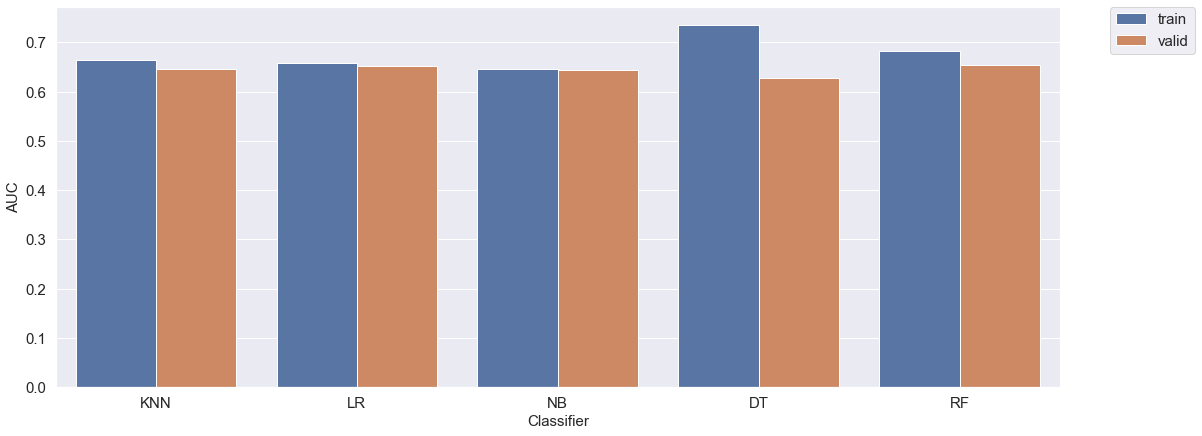

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(18, 7))
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()
plt.savefig("Model Comparision.jpeg")

In [40]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

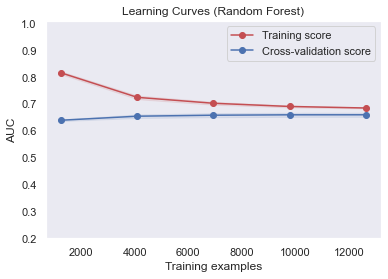

In [41]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

### Feature Importance

### LR

In [42]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

feature_importances.head()

,importance
number_inpatient,0.491292
discharge_disposition_id_22,0.230736
number_emergency,0.106073
number_diagnoses,0.092067
discharge_disposition_id_3,0.090257


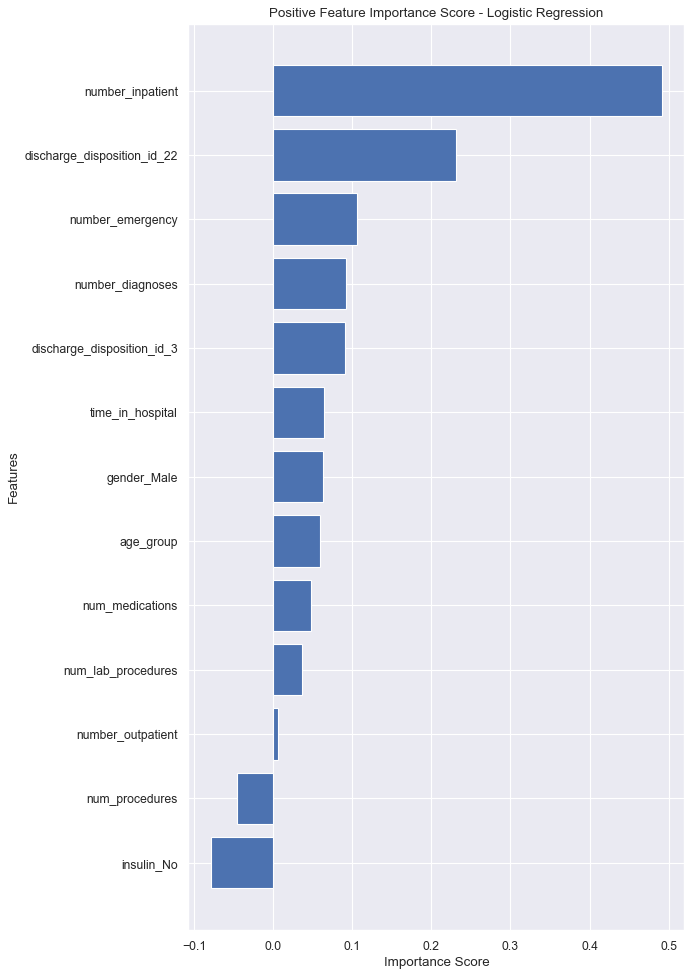

In [43]:
num = 13
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

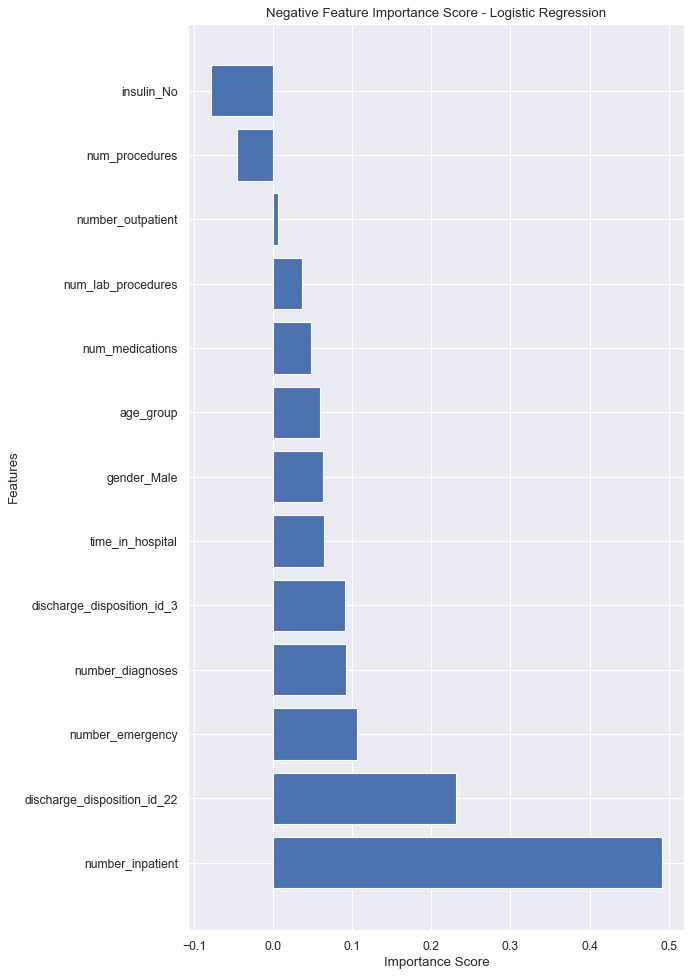

In [44]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

### RFC

In [45]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

feature_importances.head()

,importance
number_inpatient,0.434331
discharge_disposition_id_22,0.097469
num_medications,0.080577
number_emergency,0.078832
time_in_hospital,0.063827


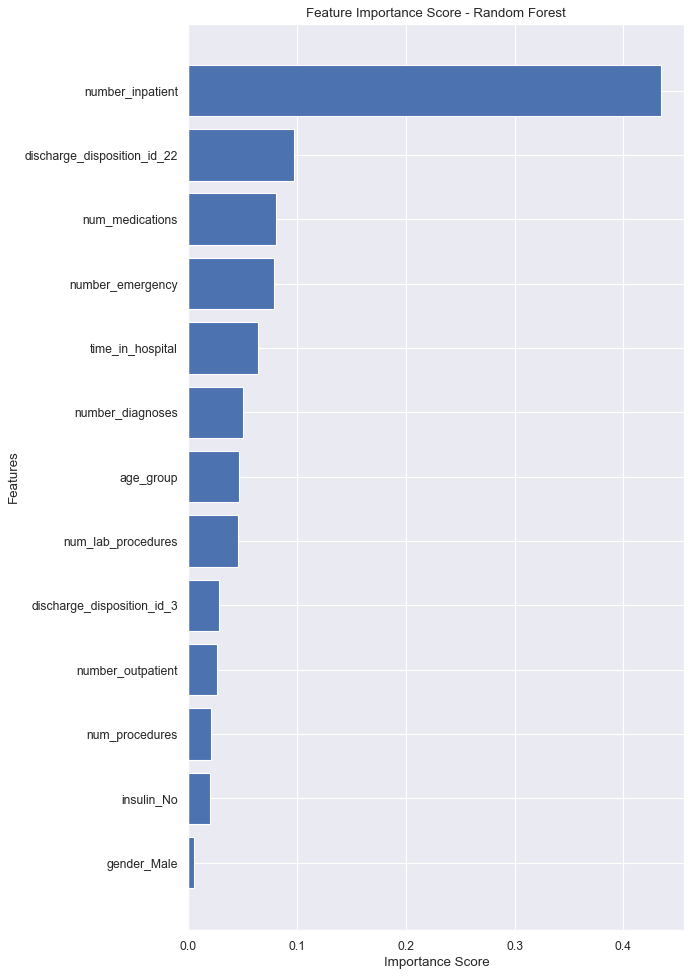

In [46]:
num = 13
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In [47]:
feature_importances[:13]

,importance
number_inpatient,0.434331
discharge_disposition_id_22,0.097469
num_medications,0.080577
number_emergency,0.078832
time_in_hospital,0.063827
number_diagnoses,0.050515
age_group,0.046955
num_lab_procedures,0.045916
discharge_disposition_id_3,0.028599
number_outpatient,0.026619


In [48]:
imp_features = [
    'number_inpatient',
    'discharge_disposition_id_22',
    'number_emergency',
    'number_diagnoses',
    'num_medications',
    'time_in_hospital',
    'num_lab_procedures',
    'insulin_No',
    'age_group',
    'number_outpatient',
    'discharge_disposition_id_3',
    'num_procedures',
]

### Hyperparamet Tuning

In [49]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [51]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [52]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

rf_random.best_params_

Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\users\lucaw\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\users\lucaw\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\users\lucaw\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

82.0355236530304


{'n_estimators': 200,
 'min_samples_split': 8,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'entropy'}

In [53]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.682
Validation AUC:0.654
Optimized Random Forest
Training AUC:0.705
Validation AUC:0.656


### Downloading Model

In [54]:
pickle.dump(rf_random.best_estimator_, open('reAdmissionDiabeticsModel.pkl', 'wb'),protocol = 4)

### Model Evaluation

In [55]:
X_test = df_test[cols2use].values
y_test = df_test['OUTPUT_LABEL'].values

scaler = pickle.load(open('./StndSclr.sav', 'rb'))
first_column = X_test[:, 0]
remaining_columns = X_test[:, 1:]
normalized_columns = scaler.fit_transform(remaining_columns)
X_test_tf = np.column_stack((first_column, normalized_columns))

best_model = pickle.load(open('./reAdmissionDiabeticsModel.pkl','rb'))

In [56]:
df_test[cols2use]

,gender_Male,number_inpatient,discharge_disposition_id_22,number_emergency,number_diagnoses,num_medications,time_in_hospital,num_lab_procedures,insulin_No,age_group,number_outpatient,discharge_disposition_id_3,num_procedures
90217,0,5,0,0,8,7,3,53,0,40,0,0,0
56368,1,0,0,0,8,15,6,71,1,50,0,0,3
78373,0,1,0,0,9,14,4,9,1,70,0,0,0
94256,1,1,0,0,9,10,7,46,1,70,0,0,3
8160,0,0,0,0,5,12,6,45,0,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94989,0,1,0,0,9,11,1,13,0,60,0,0,5
72416,0,0,0,0,9,16,3,47,1,40,0,0,3
45827,1,0,0,0,7,44,9,57,1,60,0,0,6
30972,0,1,0,0,9,8,3,50,0,70,1,0,1


In [57]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.705
accuracy:0.646
recall:0.591
precision:0.663
specificity:0.700
prevalence:0.500
 
Validation:
AUC:0.656
accuracy:0.647
recall:0.580
precision:0.179
specificity:0.656
prevalence:0.114
 
Test:
AUC:0.661
accuracy:0.635
recall:0.583
precision:0.178
specificity:0.642
prevalence:0.117
 


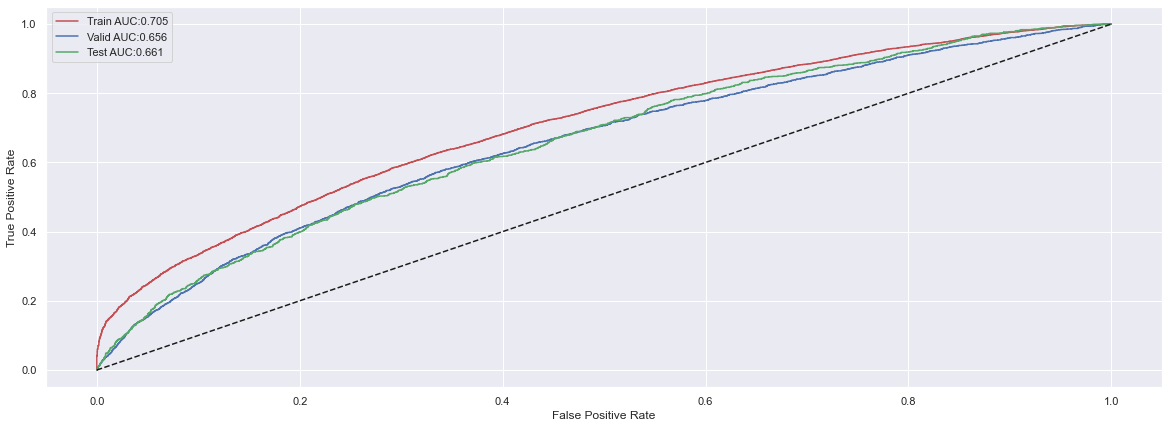

In [58]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.figure(figsize = (20, 7))
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ADS Analysis
- This part shows how we analyze and evaluate the ADS based on accuracy and fairness metrics

### Accuracy Metrics

In [59]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from IPython.display import clear_output

In [60]:
X_test = df_test[cols2use]
y_test = df_test['OUTPUT_LABEL']
y_pred = best_model.predict(X_test_tf)

In [61]:
# replace the sensitive sex by string
X_test['gender_Male'].replace({0:'female', 1:'male'}, inplace=True)

C:\Users\Lucaw\AppData\Local\Temp\ipykernel_8508\369923407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['gender_Male'].replace({0:'female', 1:'male'}, inplace=True)


In [62]:
# age category:
# Children: 0-10 yrs
# Adolescent: 10-20 yrs
# Adult: 20-70 yrs
# Seniors: 70 yrs+

# Define function to map age groups to categories
def map_age_group(age):
    if age < 10:
        return 'children'
    elif age < 20:
        return 'adolescent'
    elif age < 70:
        return 'adult'
    else:
        return 'senior'

# Apply function to age_group column
X_test['age_category'] = X_test['age_group'].apply(map_age_group)

# add a new gender_age attribute
X_test['gender_age'] = X_test['gender_Male'].astype(str) +"_"+ X_test['age_category'].astype(str)

In [63]:
X_test.head()

,gender_Male,number_inpatient,discharge_disposition_id_22,number_emergency,number_diagnoses,num_medications,time_in_hospital,num_lab_procedures,insulin_No,age_group,number_outpatient,discharge_disposition_id_3,num_procedures,age_category,gender_age
90217,female,5,0,0,8,7,3,53,0,40,0,0,0,adult,female_adult
56368,male,0,0,0,8,15,6,71,1,50,0,0,3,adult,male_adult
78373,female,1,0,0,9,14,4,9,1,70,0,0,0,senior,female_senior
94256,male,1,0,0,9,10,7,46,1,70,0,0,3,senior,male_senior
8160,female,0,0,0,5,12,6,45,0,70,0,0,1,senior,female_senior


In [64]:
# Evaluate the fairness of the classifier using the MetricFrame class for the `SEX` variable

# changing sensitive feature inputs to be 'male' and 'female' instead of 1 and 0
sensitive_feature_sex = X_test['gender_Male'].replace({0:'female', 1:'male'})

#evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Recall': recall_score,
    'Precision': precision_score,
    'F1 score': f1_score,
}

grouped_on_sex = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_pred,
                             sensitive_features=sensitive_feature_sex)

In [65]:
grouped_on_sex.overall

Accuracy     0.635164
Recall       0.582857
Precision    0.178114
F1 score     0.272849
dtype: float64

In [66]:
grouped_on_sex.by_group

,Accuracy,Recall,Precision,F1 score
gender_Male,,,,
female,0.630043,0.601786,0.177182,0.273761
male,0.641188,0.561224,0.179270,0.271739


In [67]:
# Evaluate the fairness of the classifier using the MetricFrame class for the `age_group` variable

# changing sensitive feature inputs to be 'male' and 'female' instead of 1 and 0
sensitive_feature_age = X_test['age_category']

grouped_on_age = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=y_pred,
                             sensitive_features=sensitive_feature_age)

C:\users\lucaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\users\lucaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\users\lucaw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [68]:
grouped_on_age.overall

Accuracy     0.635164
Recall       0.582857
Precision    0.178114
F1 score     0.272849
dtype: float64

In [69]:
# NOTE: the warning above is resulted from the test dataset.
# As ALL individuals in the age_category of children have label=0, therefore recall, precision and f-score are ill-defined
# This could be reflected in the chart below
grouped_on_age.by_group

,Accuracy,Recall,Precision,F1 score
age_category,,,,
adolescent,0.698413,0.500000,0.052632,0.095238
adult,0.676682,0.574144,0.183141,0.277701
children,1.000000,0.000000,0.000000,0.000000
senior,0.583042,0.591954,0.174774,0.269869


We utilized fairlearn to evaluate accuracy metrics of the ADS. We looked at accuracy, recall, precision and f1 socre. (这里添加一下这四个metrics的定义, 可以让gpt简述一下) In this process, we looked at 2 sensitive features that were included in the original ADS: age and gender. For the purpose of evaluation, we decided to transform age values into age groups. 0-10 year olds are categorized as children; 10-20 years old are categorized as adolescent; 20-0 years are categorized as adult; 70 years old or higher are categorized as seniors. 
The overall performance of the ADS is that the accuracy is 0.635499, the recall is 0.580000, the precision is 0.177706, and the F1 score is 0.272057. Then we used sex as the sensitive feature and showed difference of the 4 accuracy metrics between different gender groups. (此处插入cell #66的图片) From the table, we may notice that males are receiving a higher accuracy, higher precision and higher F1 score, while females are receiving a higher recall score. （让gpt analyse一下）
We also used age as the sensitive feature and showed difference of the 4 accuracy metrics between different age groups. (此处插入cell #69的图片) Note that the original dataset does not include as many as children or adolescent as adults. This actually tells us that the original dataset is not showing a fair representation of patients from various age groups. Some people may argue that it is natural not to include as many children as adults because obesity is far more common in adults or older individuals. However, this is not true because childhood obesity is becoming a serious global public health issue in the modern era. (找点back-up文章说明一下) Now, because of the limited number of children patients we have in this case, all children in the dataset have label=0 (no readmission), therefore recall, precision and f-score are ill-defined. This could also be reflected in the table above, as the accuracy is 1 and recall, precision and f1 score are all 0 for children. For other age groups, we see that adolescent and adult are having a higher accuracy score than seniors. However, seniors have a higher recall than adolescents and adults. In terms of precision and F1 score, adults and senior have relatively the same score, but adolescents have a much lower score for both metrics. (让gpt analyse一下)

### Fairness Metrics

In [70]:
# %%capture
#@markdown
!pip install aequitas
!pip install folktables
!git clone https://github.com/lurosenb/superquail

fatal: destination path 'superquail' already exists and is not an empty directory.


In [71]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# generate pred_Data for aequitas
pred_data = X_test.filter(items=['gender_Male', 'age_category', 'gender_age'])
pred_data['score'] = y_pred
pred_data['label_value'] = y_test

# Score and label_value need to be int
pred_data['score'] = pred_data['score'].astype('int')
pred_data['label_value'] = pred_data['label_value'].astype('int')
pred_data.head()

,gender_Male,age_category,gender_age,score,label_value
90217,female,adult,female_adult,1,1
56368,male,adult,male_adult,0,0
78373,female,senior,female_senior,1,1
94256,male,senior,male_senior,1,0
8160,female,senior,female_senior,0,0


In [73]:
aq_palette = sns.diverging_palette(225, 35, n=2)

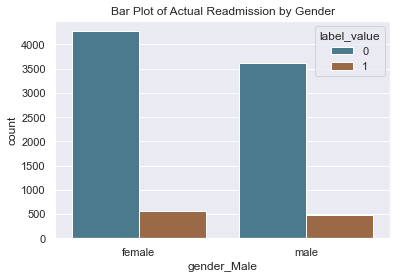

In [74]:
label_by_gender = sns.countplot(x="gender_Male", hue="label_value", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Actual Readmission by Gender");

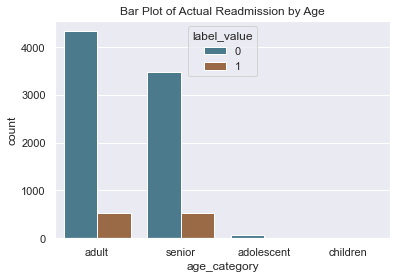

In [75]:
label_by_age = sns.countplot(x="age_category", hue="label_value", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Actual Readmission by Age");

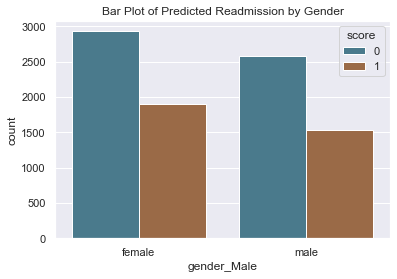

In [76]:
score_gender = sns.countplot(x="gender_Male", hue="score", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Predicted Readmission by Gender");

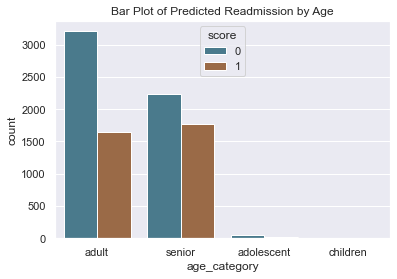

In [77]:
score_age = sns.countplot(x="age_category", hue="score", data=pred_data, palette=aq_palette)
plt.title("Bar Plot of Predicted Readmission by Age");

In the four bar plots above, we showed the distribution of actual and predicted readmission by gender and by age. Let's firstly compare the real and predicted readmission by gender. From the plots, we may find out that the actual count of readmissions is higher for females than males. In the prediction of the ADS, this pattern is kept. However, as the ADS predicted more readmissions than the actual case, the difference of readmission counts between males and female was amplified accordingly. We then move to compare the real and predicted readmission by age groups. One clear observation is that in the actual case, the number of readmissions of seniors is relatively the same as adults. However, in the prediction, we observe that seniors are having more predicted readmissions than adults. (这里不知道有没有什么可以说的)

In [78]:
g = Group()
xtab, _ = g.get_crosstabs(pred_data)

In [79]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,3436,gender_Male,female,1902,2931,1565,223,2708,337,560,4273,4833,8941
1,0,binary 0/1,3436,gender_Male,male,1534,2574,1259,215,2359,275,490,3618,4108,8941
2,0,binary 0/1,3436,age_category,adolescent,19,44,18,1,43,1,2,61,63,8941
3,0,binary 0/1,3436,age_category,adult,1649,3210,1347,224,2986,302,526,4333,4859,8941
4,0,binary 0/1,3436,age_category,children,0,9,0,0,9,0,0,9,9,8941
5,0,binary 0/1,3436,age_category,senior,1768,2242,1459,213,2029,309,522,3488,4010,8941
6,0,binary 0/1,3436,gender_age,female_adolescent,11,24,10,1,23,1,2,33,35,8941
7,0,binary 0/1,3436,gender_age,female_adult,861,1611,692,112,1499,169,281,2191,2472,8941
8,0,binary 0/1,3436,gender_age,female_children,0,4,0,0,4,0,0,4,4,8941
9,0,binary 0/1,3436,gender_age,female_senior,1030,1292,863,110,1182,167,277,2045,2322,8941


In [80]:
# same issue here: too small sample size for children or adolescent
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,gender_Male,female,0.60,0.63,0.08,0.82,0.37,0.40,0.92,0.18,0.55,0.39,0.12
1,gender_Male,male,0.56,0.65,0.08,0.82,0.35,0.44,0.92,0.18,0.45,0.37,0.12
2,age_category,adolescent,0.50,0.70,0.02,0.95,0.30,0.50,0.98,0.05,0.01,0.30,0.03
3,age_category,adult,0.57,0.69,0.07,0.82,0.31,0.43,0.93,0.18,0.48,0.34,0.11
4,age_category,children,NaN,1.00,0.00,NaN,0.00,NaN,1.00,NaN,0.00,0.00,0.00
5,age_category,senior,0.59,0.58,0.10,0.83,0.42,0.41,0.90,0.17,0.51,0.44,0.13
6,gender_age,female_adolescent,0.50,0.70,0.04,0.91,0.30,0.50,0.96,0.09,0.00,0.31,0.06
7,gender_age,female_adult,0.60,0.68,0.07,0.80,0.32,0.40,0.93,0.20,0.25,0.35,0.11
8,gender_age,female_children,NaN,1.00,0.00,NaN,0.00,NaN,1.00,NaN,0.00,0.00,0.00
9,gender_age,female_senior,0.60,0.58,0.09,0.84,0.42,0.40,0.91,0.16,0.30,0.44,0.12


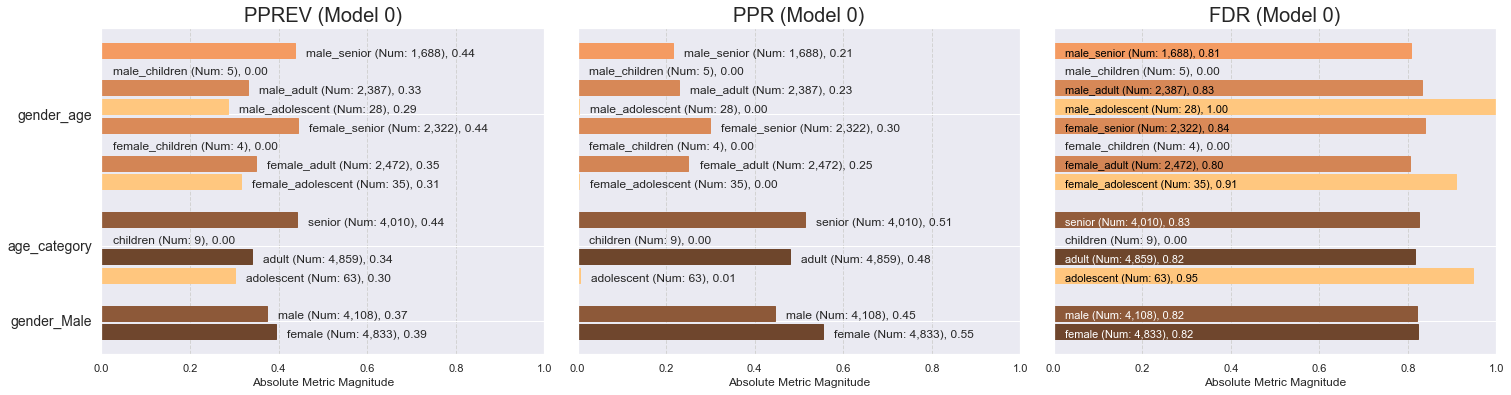

<Figure size 432x288 with 0 Axes>

In [81]:
# prevalence, PPR, FDR
aqp = Plot()
p = aqp.plot_group_metric_all(xtab, metrics=['pprev','ppr', 'fdr'], ncols=3)

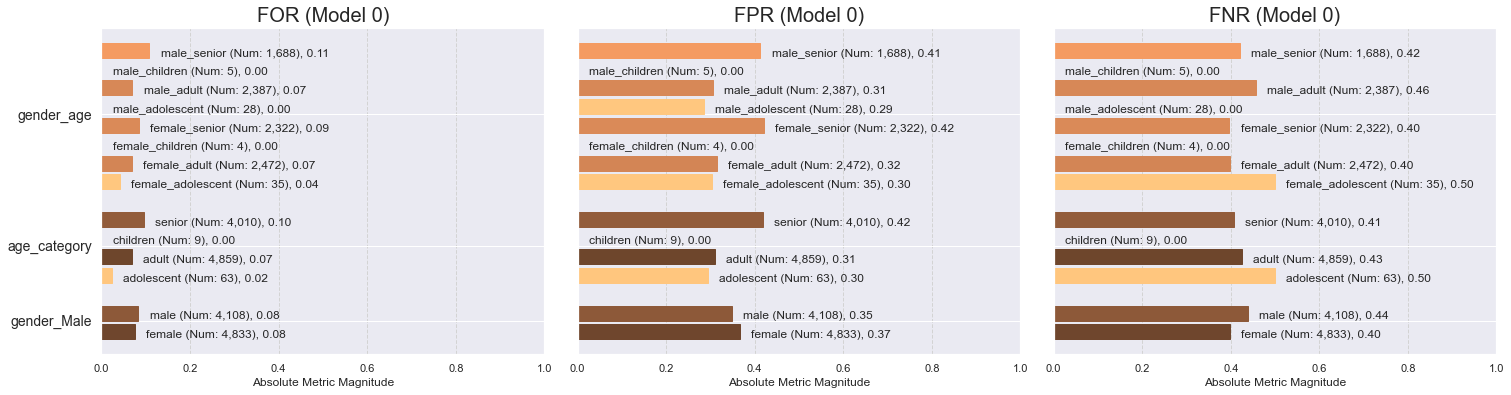

<Figure size 432x288 with 0 Axes>

In [82]:
# FOR, FPR, FNR
p = aqp.plot_group_metric_all(xtab, metrics=['for', 'fpr', 'fnr'], ncols=3)

We used Aequitas to draw plots so that we could compare the fairness metrics, including prevalence, PPR, FDR, FOR, FPR, and FNR, of different subgroups of data. As previously mentioned, this dataset has very limited number of children and adolescent. This is a pre-existing issue with the data, which we hope to discuss in further sections. Therefore, we decide not to include the subgroups of children, adolescent and their relavent gender_age group (e.g. male_children) in the analysis of this part. 
(对比除了children和adolescent之外的其他metrics)

### SHAP

In [83]:
import shap
from IPython.display import Image
from IPython.core.display import HTML 
import operator
from collections import defaultdict
shap.initjs()

In [84]:
# Initialize the explainer
explainer = shap.TreeExplainer(best_model, feature_perturbation="tree_path_dependent")
# Apply it to the test data
shap_values = explainer.shap_values(X_test_tf)

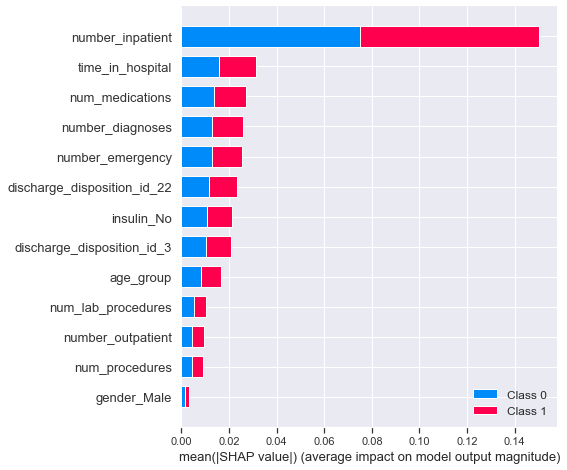

In [85]:
shap.summary_plot(shap_values, X_test_tf, feature_names=cols2use)

From the summary plot, we may notice that the most impactful feature is number_inpatient. This result goes in line with the feature importance done by the author of the ADS. gender_Male, as one of the two sensitive features in the data, is ranked the lowest impact to model decisions, indicating that gender is bringing a relatively small impact of model output. The other sensitive feature, which is age_group, is ranked somehow in the middle of the features.

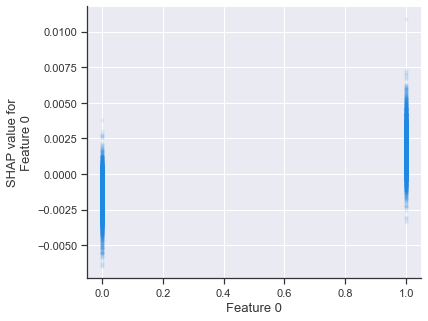

In [86]:
# Zoom in to gender
shap_values = np.array(shap_values)
shap_values_gender = shap_values[1]
shap.dependence_plot(0, shap_values_gender, X_test_tf, alpha=0.1, interaction_index=None)

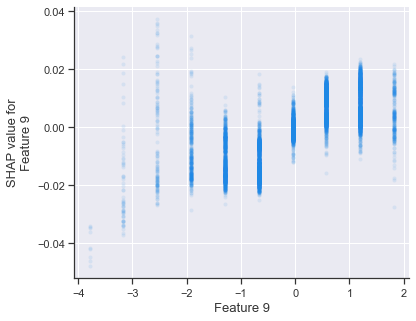

In [87]:
# Zoom in to age group
shap_values_gender = shap_values[1]
shap.dependence_plot(9, shap_values_gender, X_test_tf, alpha=0.1, interaction_index=None)

The first dependence plot shows how gender_Male relates to the outcome of the model across its range. As we can see, females have less impact on readmission than males as gender_Male=0 corresponds with less SHAP values. This seems contradictory as we see more predicted readmission for females than males. In this case, we thinkg that the impact of the "gender" feature on the model's prediction may be influenced by interactions with other features. It's possible that other features interact with the "gender" feature in a way that amplifies its effect on the model's prediction for males, leading to higher SHAP values for males despite predicting fewer readmissions.
The second dependence plot shows how age_group related to the outcome of the model across its range. As we can see, older patients are correlated with relatively higher SHAP values, indicating that they are more likely to be predicted as positive readmission. This goes in line with our previous investigation into how predicted readmission distributes across different age categories.

In [89]:
age_group_shap_values = shap_values[:, :, 9]  # Shape: (2, 8941)
gender_shap_values = shap_values[:, :, 0]  # Shape: (2, 8941)

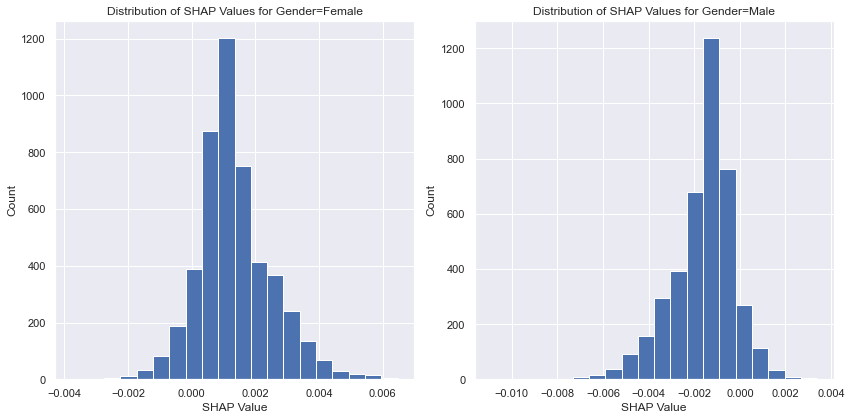

In [95]:
# Find the indices of samples where gender=female
female_indices = np.where(X_test_tf[:, 0] == 0)[0]
male_indices = np.where(X_test_tf[:, 0] == 1)[0]

# Select the SHAP values for gender=female and male samples
female_shap_values = gender_shap_values[0][female_indices]
male_shap_values = gender_shap_values[0][male_indices]

# Create subplots for gender=female and gender=male
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of SHAP values for gender=female
ax1.hist(female_shap_values, bins=20)
ax1.set_xlabel('SHAP Value')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of SHAP Values for Gender=Female')

# Plot the distribution of SHAP values for gender=male
ax2.hist(male_shap_values, bins=20)
ax2.set_xlabel('SHAP Value')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of SHAP Values for Gender=Male')

plt.tight_layout()
plt.show()

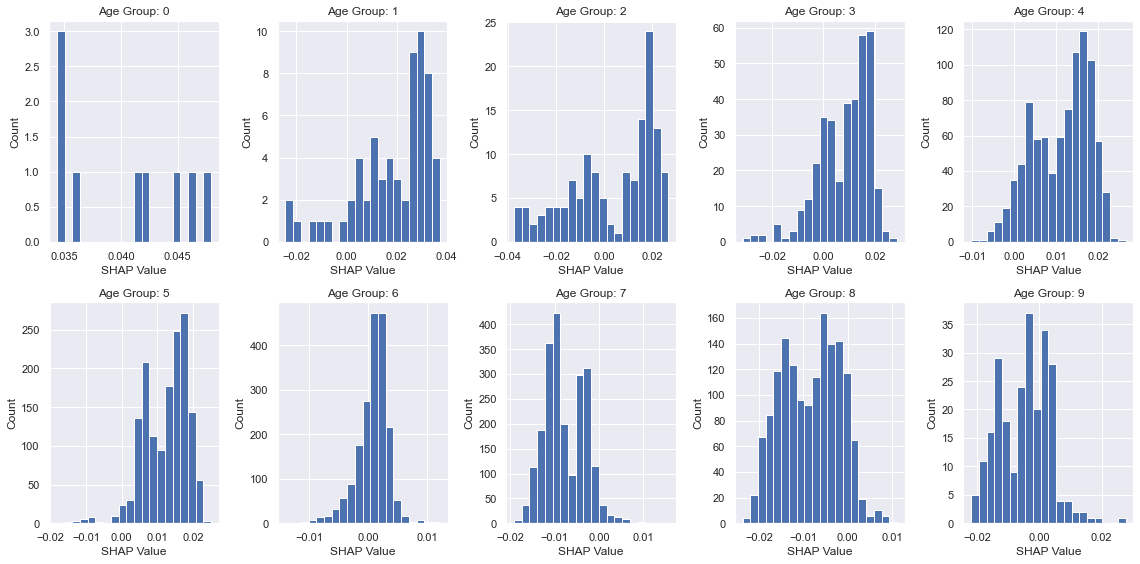

In [108]:
# Get the unique age group values
unique_age_groups = np.unique(X_test_tf[:, 9]) 

# Create subplots for each age group
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
axs = axs.ravel() 

# Iterate over each age group
for i, age_group in enumerate(unique_age_groups):
    # Find the indices of samples for the current age group
    age_group_indices = np.where(X_test_tf[:, 9] == age_group)[0] 
    
    age_group_shap = age_group_shap_values[0][age_group_indices]

    # Plot the distribution of SHAP values for the current age group
    axs[i].hist(age_group_shap, bins=20, label=i*10)
    axs[i].set_xlabel('SHAP Value')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Age Group: {i}')

plt.tight_layout()
plt.show()

We also plotted the distribution of SHAP values within each gender and age group to see the robustness and stability of the ADS. From the plots related to gender, we notice that the SHAP values follow normal distributions for both males and females, indicating that the ADS has stability and robustness while predicting on gender. From the plots related to age groups, however, we notice that SHAP values does not always follow normal distributions. For most of the age groups, the SHAP values are fluctuating across a various range of choices and fail to show stable patterns. This indicates that the ADS is not showing stability and robustness while predicting on the individuals' age groups, which makes the ADS susceptible to biases and inaccuracy. 

### Conclusion

Overall conclusion: The model has data issue, as it does not include enough data related to children and adolescent. In terms of gender, the ADS is doing a fair job. Neither males or females gain a strong advantage in this particular ADS, and the gender feature is ranked the least important in the summary plot. In terms of age, the ADS prefers to predict readmission more for older patients. This actually makes sense as older people truly tend to have worse health conditions. However, the ADS has serious pre-existing bias towards the younger population, which certainly neglect the increasingly serious public health hazard of childhood obesity. As the author of the ADS did not provide any information about the data source, our assumption is that the data was collected at an earlier time, during which childhood obesity had not been paid enough attention to.